### 1. Configuração do Ambiente

In [5]:
# Importa a biblioteca para conectar ao Google Drive e para interagir com o sistema de ficheiros.
from google.colab import drive
import os

# Pede autorização e monta o seu Google Drive na pasta '/content/drive'.
# Aparecerá um pop-up a pedir para escolher a sua conta Google e autorizar.
drive.mount('/content/drive')

# --- Cria uma pasta de projeto no seu Google Drive (se ainda não existir) ---
drive_project_path = '/content/drive/MyDrive/predictive_maintenance_project/'
os.makedirs(drive_project_path, exist_ok=True)
print(f"Pasta do projeto pronta em: {drive_project_path}")

# --- Configuração do Kaggle para baixar os dados ---
# Instala a biblioteca do Kaggle.
!pip install kaggle -q
from google.colab import files

# Solicita o upload do seu ficheiro kaggle.json.
print("\nFaça o upload do seu ficheiro 'kaggle.json'")
files.upload()

# Configura o diretório e as permissões do ficheiro do Kaggle.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Baixa os ficheiros do dataset de Manutenção Preditiva.
print("\nBaixando os dados do Kaggle...")
!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification

# Descompacta o ficheiro baixado.
print("\nDescompactando os ficheiros...")
!unzip -q machine-predictive-maintenance-classification.zip

print("\n--- Ambiente Pronto! O dataset foi baixado. ---")
# Lista os ficheiros para confirmar que o .csv está presente no ambiente do Colab.
!ls

O dataset tem 10000 linhas (registos) e 10 colunas (features).

Amostra das 5 primeiras linhas dos dados:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure



Informações sobre as colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### 2. Importação das Bibliotecas Principais

In [2]:
# 'pandas' é a principal ferramenta para trabalhar com dados em formato de tabela (DataFrames).
import pandas as pd
# 'numpy' é usado para operações numéricas eficientes.
import numpy as np
# 'matplotlib.pyplot' e 'seaborn' são usados para criar gráficos e visualizações de dados.
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### 3. Carregar o Dataset e Fazer uma Inspeção Inicial

In [6]:
# Define o nome do ficheiro de dados que foi descompactado na Célula 1.
# CORREÇÃO: Usamos o nome de ficheiro correto que vimos no output.
data_file = 'predictive_maintenance.csv'

# Usa a função read_csv do Pandas para carregar o nosso ficheiro de dados.
df = pd.read_csv(data_file)

# Imprime as dimensões do nosso DataFrame (número de linhas, número de colunas).
print(f"O dataset tem {df.shape[0]} linhas (registos) e {df.shape[1]} colunas (features).")

# Exibe as 5 primeiras linhas do DataFrame para vermos a estrutura dos dados.
print("\nAmostra das 5 primeiras linhas dos dados:")
display(df.head())

# Exibe informações gerais sobre o DataFrame.
print("\nInformações sobre as colunas e tipos de dados:")
df.info()

O dataset tem 10000 linhas (registos) e 10 colunas (features).

Amostra das 5 primeiras linhas dos dados:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure



Informações sobre as colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### 4. Análise da Variável Alvo (Falhas)

Distribuição da variável 'Target':
Target
0    9661
1     339
Name: count, dtype: int64


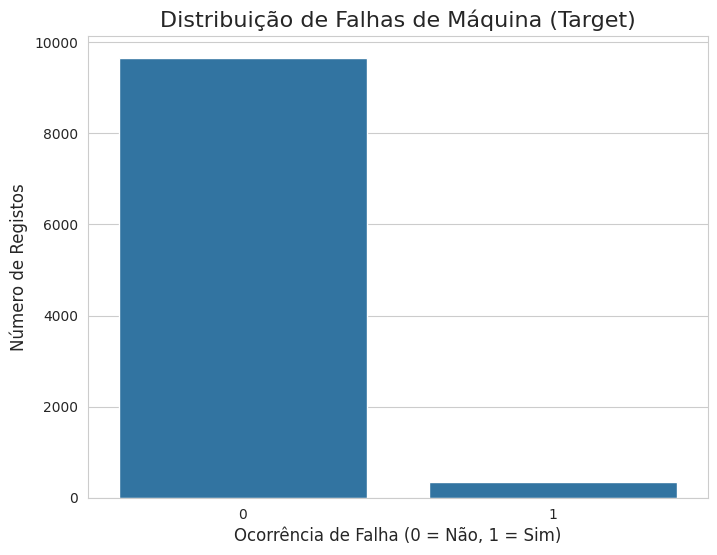


Distribuição dos Tipos de Falha:
Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64


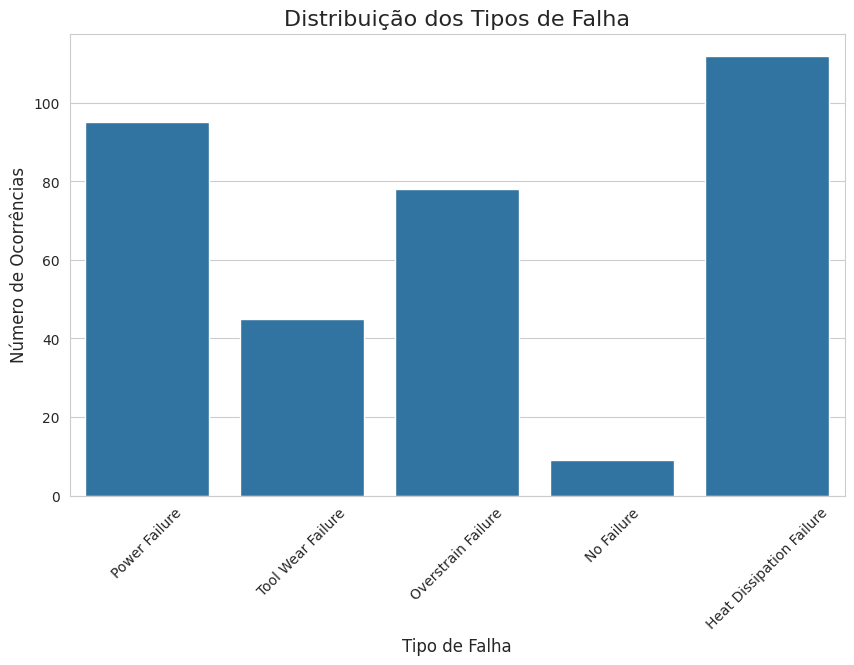

In [7]:
# Define um estilo visual mais agradável para os nossos gráficos.
sns.set_style("whitegrid")

# Imprime a contagem exata de cada valor na coluna 'Target'.
# 0 representa 'No Failure', 1 representa 'Machine Failure'.
print("Distribuição da variável 'Target':")
print(df['Target'].value_counts())

# --- Visualização ---
# Cria uma figura para o nosso gráfico.
plt.figure(figsize=(8, 6))

# Cria um gráfico de contagem (countplot) com o Seaborn.
# Este gráfico mostra o número de ocorrências para cada categoria.
sns.countplot(x='Target', data=df)

# Define o título e os rótulos dos eixos.
plt.title('Distribuição de Falhas de Máquina (Target)', fontsize=16)
plt.xlabel('Ocorrência de Falha (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de Registos', fontsize=12)

# Mostra o gráfico.
plt.show()

# --- Análise do Tipo de Falha ---
# Vamos também ver a distribuição dos diferentes tipos de falha.
# Filtramos o DataFrame para incluir apenas as linhas onde uma falha ocorreu (Target == 1).
failure_df = df[df['Target'] == 1]

print("\nDistribuição dos Tipos de Falha:")
print(failure_df['Failure Type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Failure Type', data=failure_df)
plt.title('Distribuição dos Tipos de Falha', fontsize=16)
plt.xlabel('Tipo de Falha', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(rotation=45) # Rotaciona os nomes para melhor visualização
plt.show()

### 5. Matriz de Correlação entre as Features e o Alvo

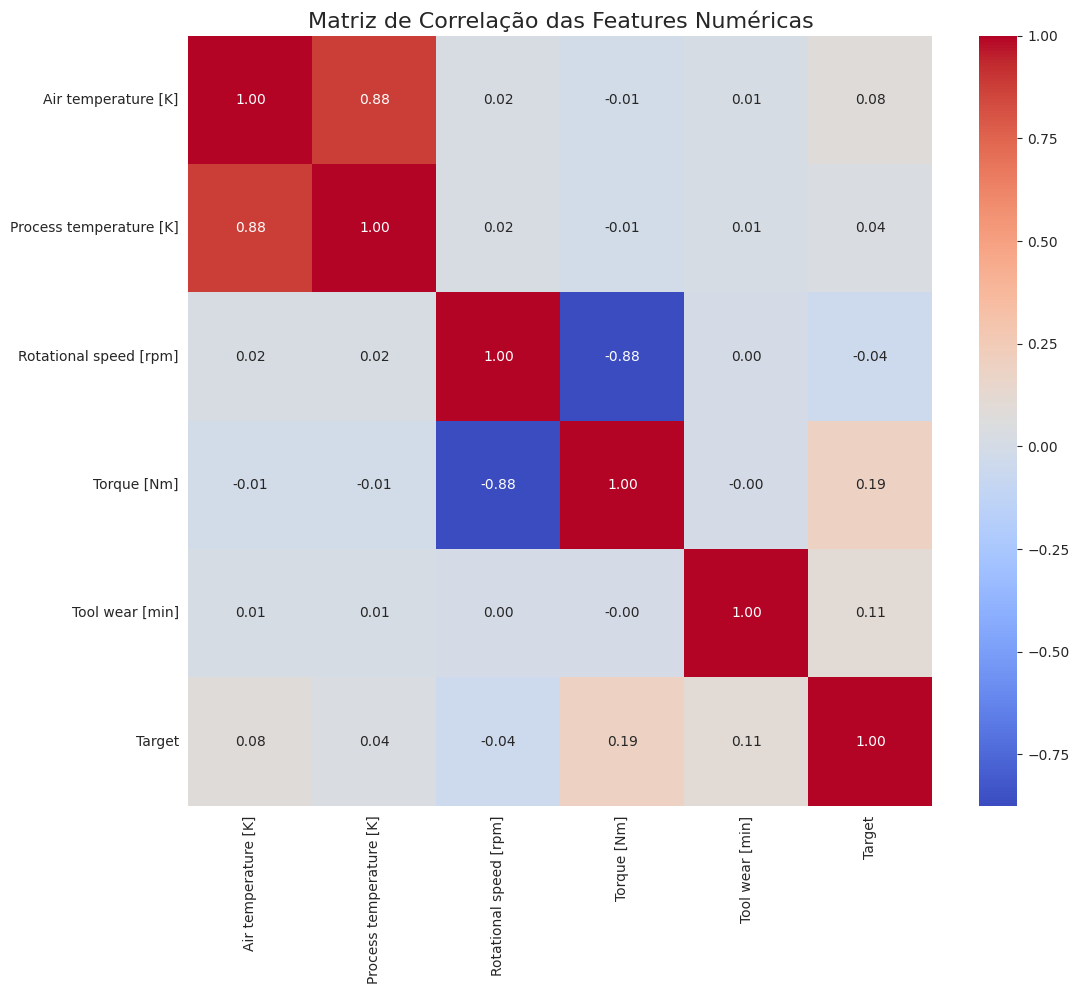

In [8]:
# Seleciona apenas as colunas numéricas do DataFrame para a análise de correlação.
# Excluímos 'UDI' e 'Product ID' porque são identificadores, não features.
numeric_df = df.select_dtypes(include=np.number).drop(columns=['UDI'])

# Calcula a matriz de correlação usando o método .corr() do Pandas.
correlation_matrix = numeric_df.corr()

# --- Visualização do Heatmap ---
# Cria uma figura grande para o nosso mapa de calor.
plt.figure(figsize=(12, 10))

# Cria o heatmap usando o Seaborn.
# annot=True mostra os valores de correlação dentro de cada célula.
# cmap='coolwarm' é um bom esquema de cores para ver correlações positivas e negativas.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Define o título do nosso gráfico.
plt.title('Matriz de Correlação das Features Numéricas', fontsize=16)

# Mostra o gráfico.
plt.show()

### 6. Pré-processamento Final e Salvamento dos Dados

In [9]:
# Importa as ferramentas que vamos usar para o pré-processamento.
from sklearn.preprocessing import StandardScaler

print("Iniciando o pré-processamento final dos dados...")

# Faz uma cópia do DataFrame para não alterarmos o original.
df_processed = df.copy()

# 1. Limpar as Colunas: Removemos colunas de identificação e a coluna 'Failure Type',
# pois a nossa variável alvo principal é a coluna 'Target' (0 ou 1).
df_processed = df_processed.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

# 2. Converter Dados Categóricos: pd.get_dummies() transforma a coluna 'Type'
# em três novas colunas (Type_H, Type_L, Type_M), com valores 0 ou 1.
df_processed = pd.get_dummies(df_processed, columns=['Type'], drop_first=True)

# Separa o DataFrame em features (X) e o alvo (y).
X = df_processed.drop('Target', axis=1)
y = df_processed['Target']

# 3. Normalizar os Dados Numéricos:
# Identifica as colunas que precisam de ser normalizadas.
features_to_scale = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Cria uma instância do StandardScaler.
scaler = StandardScaler()
# Aplica a normalização.
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

print("\nPré-processamento concluído! Amostra dos dados processados (X):")
display(X.head())

# --- Salvamento dos Dados Processados no Google Drive ---
# Define os caminhos para guardar os nossos ficheiros finais.
X_path = os.path.join(drive_project_path, 'X_processed.npy')
y_path = os.path.join(drive_project_path, 'y_processed.npy')

# Guarda os arrays X e y em formato .npy (formato nativo do NumPy).
np.save(X_path, X.values)
np.save(y_path, y.values)

print(f"\nDados processados guardados com sucesso no seu Google Drive!")
print(f"Ficheiro de features: {X_path}")
print(f"Ficheiro do alvo: {y_path}")
print("\n--- Fim do Notebook de Análise e Manipulação de Dados ---")

Iniciando o pré-processamento final dos dados...

Pré-processamento concluído! Amostra dos dados processados (X):


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,False,True
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,True,False
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,True,False
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,True,False
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,True,False



Dados processados guardados com sucesso no seu Google Drive!
Ficheiro de features: /content/drive/MyDrive/predictive_maintenance_project/X_processed.npy
Ficheiro do alvo: /content/drive/MyDrive/predictive_maintenance_project/y_processed.npy

--- Fim do Notebook de Análise e Manipulação de Dados ---
